Titanic Survival prediction

Hello, this is my first kernel here, I am beginning my studies of data science, more focused on machine learning.
        
Please feel free to comment.

**Importing libraries.
**

First, we will use the block below to load some Python libraries who will be used at this kernel.


In [1]:
#data analysis libraries

import numpy as np
import pandas as pd

#visualization libraries

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Reading the data.**

In [7]:
#train data
url = '../input/titanic/train.csv'
train = pd.read_csv(url)

url = '../input/titanic/test.csv'
test = pd.read_csv(url)

**Showing the training data.**

In [8]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Robins, Mrs. Alexander A (Grace Charity Laury)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Data analysis.**

In [9]:
#show the first ten rows of the dataset
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
656,657,0,3,"Radeff, Mr. Alexander",male,NaN,0,0,349223,7.8958,NaN,S


In [10]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


analysing the dataset, we find four numerical features(Age(continuous), fare(continous), SibSp(discrete), Parch(discrete)), four categorical features(Survived, Sex, Embarked, Pclass) and two alphanumeric features(Ticket and Cabin).

There are a total of 891 passengers on training data; The column 'Age' has 714 values, and consequently 177 NaN values. I think these values is very important for our model and we should try to fullfill it; Only 204 rows has data on 'Cabin' column, since more than 70% of the column doesn't have data, we should ignore it; Only 2 values is missing on Embarked feature, probably won't be a problem.



We will drop Ticket feature, It may not have correlation with Survival.

Cabin feature contains many null values and we will drop it.

Name and Passengerid may not contribute to survival and will be dropped.

**Data visualization
**

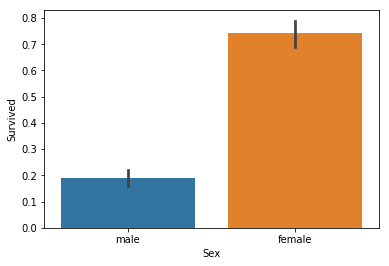

In [11]:
#barplot of survivals by sex
sns.barplot(x="Sex", y="Survived", data=train)

Barplot show us that females have more chance to survive.

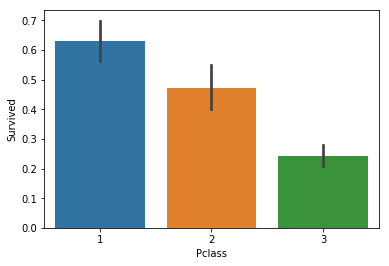

In [12]:
#Barplot of Pclass.
sns.barplot(x="Pclass", y="Survived", data=train)

Passengers of higher classes have better chance of survival.

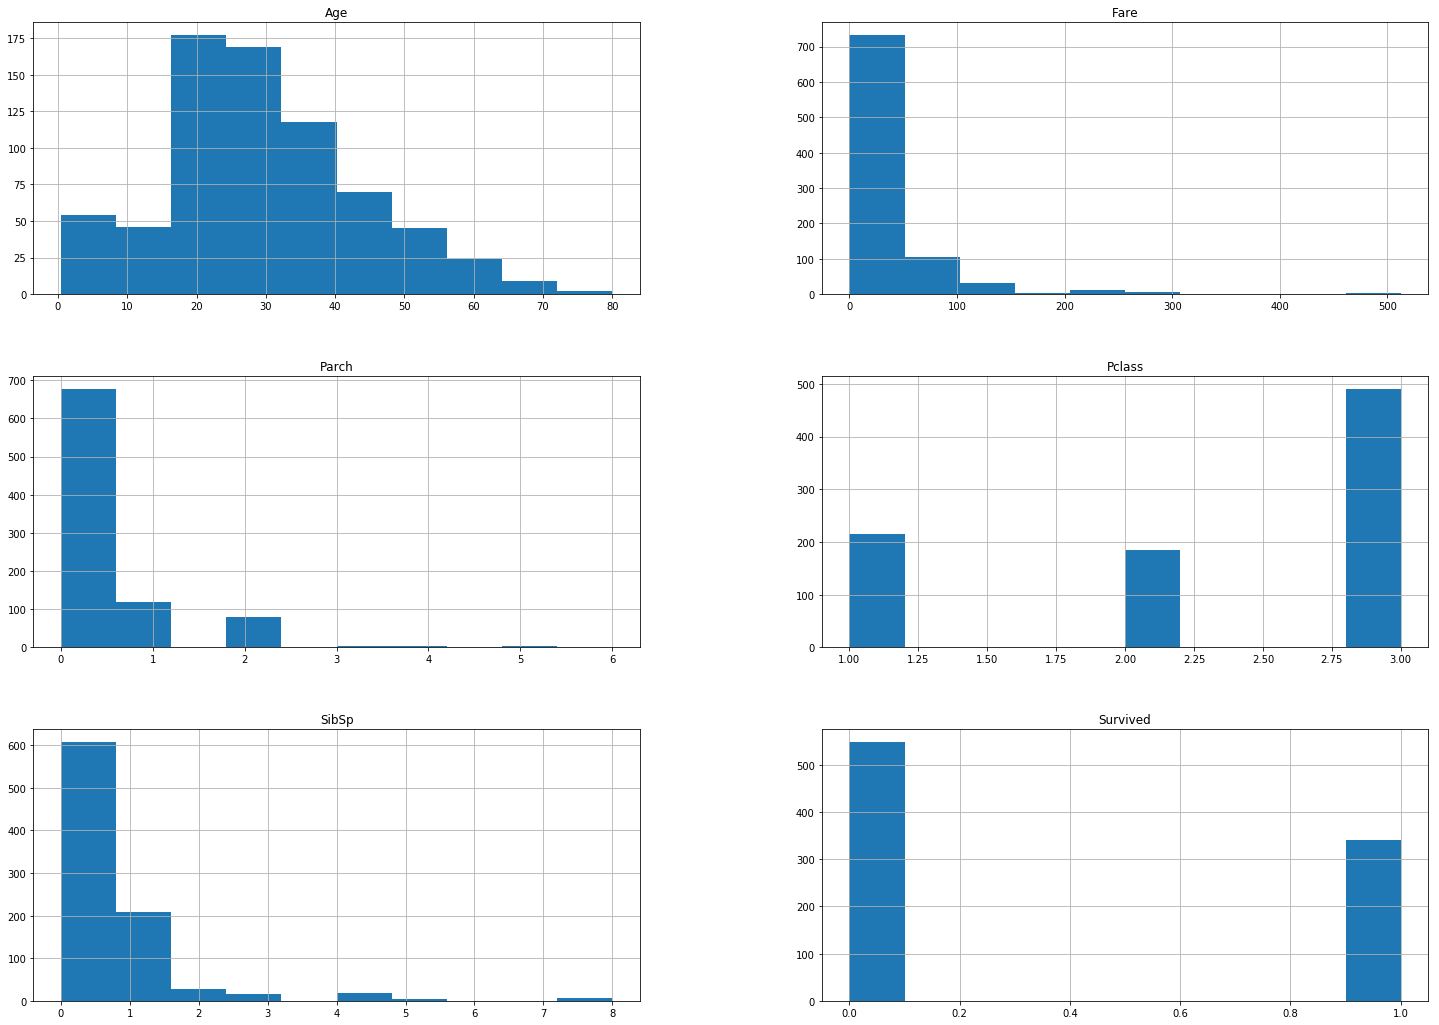

In [13]:
train.drop(['PassengerId'], 1).hist(figsize=(25,18))
plt.show()

Only about 37% of passengers survived.

Majority of fare tickets are below 50.

The people have better chance to survive if they are alone (sibsp and parch).

**Cleaning data**

Filling the Embarked feature missing values.

In [14]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [15]:
#Filling the missing values with S (where the majority embarked).
train = train.fillna({"Embarked": "S"})

In [16]:
test = test.fillna({"Embarked": "S"})

In [17]:
#Filling the missing values based on mean fare for that Pclass
#PS. Only the test database has null values
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
    

In [18]:
#converting to numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [19]:
#Drop Ticket and Cabin
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

There is high percentage of values missing in the age feature, so it makes no sense to fill these gaps with the same value as we did before.

We will replace missing values by the mean age of passengers who belong to the same group of class, sex and family.

In [20]:
#And fill the missing Age values
train['Age'] = train.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))
train['Age'] = train.groupby(['Pclass','Sex','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
train['Age'] = train.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [21]:
test['Age'] = test.groupby(['Pclass','Sex','Parch','SibSp'])['Age'].transform(lambda x: x.fillna(x.mean()))
test['Age'] = test.groupby(['Pclass','Sex','Parch'])['Age'].transform(lambda x: x.fillna(x.mean()))
test['Age'] = test.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [22]:
#count the missing values of the Age feature
print(pd.isnull(train['Age']).sum())

0


In [23]:
print(pd.isnull(test['Age']).sum())

0


In [24]:
#Here we will create a Title column
train['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in train['Name']), index=train.index)
train['Title'] = train['Title'].replace(['Lady','the Countess','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Mlle','Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')
train['Title'] = train['Title'].map({"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5})

test['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in test['Name']), index=test.index)
test['Title'] = test['Title'].replace(['Lady','the Countess','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Mlle','Ms'], 'Miss')
test['Title'] = test['Title'].replace('Mme','Mrs')
test['Title'] = test['Title'].map({"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5})

In [25]:
#Drop name and PassengerId
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)

Now We will convert sex feature to numerical.

In [26]:
#converting sex feature to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)

test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FareBand,Title
0,0,3,0,22.0,1,0,S,1,1
1,1,1,1,38.0,1,0,C,4,3
2,1,3,1,26.0,0,0,S,2,2
3,1,1,1,35.0,1,0,S,4,3
4,0,3,0,35.0,0,0,S,2,1


Converting the embarked feature:

In [27]:
#same to Embarked feature
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

test['Embarked'] = test['Embarked'].map(embarked_mapping)

Now that our data is numeric, We can check the correlation between the features.

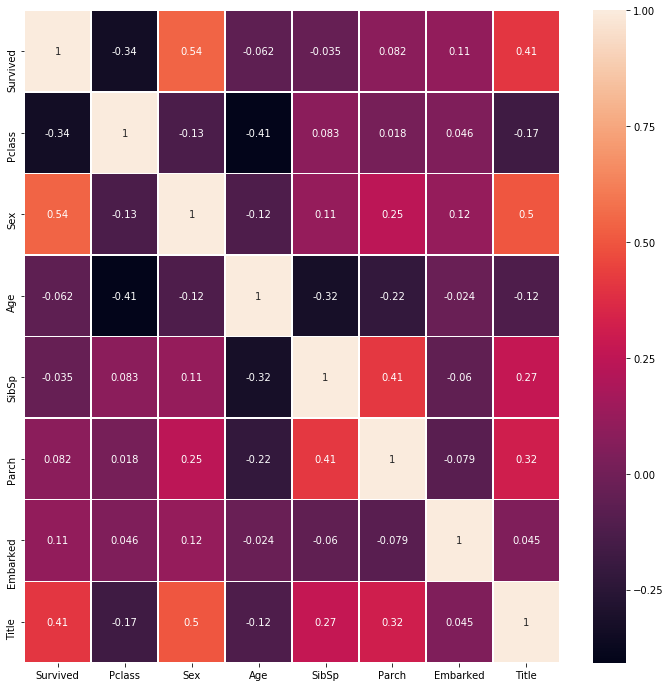

In [28]:
plt.subplots(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True, linewidths = .5)

Verifying the data before models creation.

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FareBand,Title
0,0,3,0,22.0,1,0,1,1,1
1,1,1,1,38.0,1,0,2,4,3
2,1,3,1,26.0,0,0,1,2,2
3,1,1,1,35.0,1,0,1,4,3
4,0,3,0,35.0,0,0,1,2,1


**Training models**

In [30]:
#splitting training data to test accuracy.
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived'],axis = 1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

We will test these models:

    Decision Tree Classifier
    Gaussian Naive Bayes
    Gradient Boosting Classifier
    KNN
    Logistic Regression
    Perceptron
    Random Forest Classifier
    Stochastic Gradient Descent
    Support Vector Machines


In [32]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.72


In [33]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

77.58


In [34]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.75


In [35]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

79.82


In [36]:
#Logistic Reggression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.48


In [37]:
#Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.03


In [38]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.37


In [39]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.48


In [40]:
#Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.06


In [41]:
#Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

62.78


In [42]:


models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 'SVC',  
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron, acc_linear_svc, acc_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)



,Model,Score
10,Gradient Boosting Classifier,84.75
0,Support Vector Machines,82.06
7,SVC,82.06
8,Decision Tree,80.72
1,KNN,79.82
3,Random Forest,79.37
2,Logistic Regression,78.48
9,Stochastic Gradient Descent,78.48
5,Perceptron,78.03
4,Naive Bayes,77.58


Decision Tree has the higher score.

**Submission file**

In [43]:
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis = 1))
submission = pd.DataFrame({'PassengerId' : ids, 'Survived' : predictions})
submission.to_csv('submission.csv', index = False)